# FINSIRE TEST

In [323]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import time
from datetime import datetime
nltk.download('stopwords')
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [324]:
# i have converted the excel to csv (for my convenient). I have deleted extra rows in that file.
df = pd.read_csv('/content/finsire.csv')
df.head()

,Date,Narration,Value Dt,Withdrawal Amt.,Deposit Amt.
0,01/04/21,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC0000009-109112901059-UPI,01/04/21,1.00,NaN
1,01/04/21,"NEFT DR-PUNB0668200-ROHAN-NETBANK, MUM-N091211459394676-FUNDS",01/04/21,17816.00,NaN
2,01/04/21,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC0000009-109117511967-UPI,01/04/21,24999.00,NaN
3,01/04/21,UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-109117628409-ZOMATO PAYMENT,01/04/21,111.18,NaN
4,02/04/21,UPI-MAHENDRAN K M-SRIMURUGANSUPERMARKET1969@OKHDFCBANK-HDFC0001864-109218533308-UPI,02/04/21,40.00,NaN


In [325]:
df.columns

Index(['Date', 'Narration', 'Value Dt', 'Withdrawal Amt.', 'Deposit Amt.'], dtype='object')

In [326]:
# renaming the column for user to understand
df.rename(columns = {'Value Dt':'Value Date', 'Withdrawal Amt.' : 'Debit', 'Deposit Amt.' : 'Credit'}, inplace = True)

In [327]:
# checking the no of rows and columns in the dataframe
df.shape

(225, 5)

In [328]:
#checking any null values in the dataframe
df.isnull().sum()

Date            0
Narration       0
Value Date      0
Debit          19
Credit        206
dtype: int64

In [329]:
# replacing 'nan' values with zero
df.fillna(0, inplace=True)

In [330]:
#Again checking the null values, it shows no null values
df.isnull().sum()

Date          0
Narration     0
Value Date    0
Debit         0
Credit        0
dtype: int64

In [331]:
# checking the dataframe information whether it is object or date type or integer type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        225 non-null    object 
 1   Narration   225 non-null    object 
 2   Value Date  225 non-null    object 
 3   Debit       225 non-null    float64
 4   Credit      225 non-null    float64
dtypes: float64(2), object(3)
memory usage: 8.9+ KB


In [332]:
#Based on the above information , date is misclassified as "object" type. So we are converting them to datetype.
df["Date"] = pd.to_datetime(df["Date"])
df["Value Date"] = pd.to_datetime(df["Value Date"])

In [333]:
df.head()

,Date,Narration,Value Date,Debit,Credit
0,2021-01-04,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC0000009-109112901059-UPI,2021-01-04,1.00,0.0
1,2021-01-04,"NEFT DR-PUNB0668200-ROHAN-NETBANK, MUM-N091211459394676-FUNDS",2021-01-04,17816.00,0.0
2,2021-01-04,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC0000009-109117511967-UPI,2021-01-04,24999.00,0.0
3,2021-01-04,UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-109117628409-ZOMATO PAYMENT,2021-01-04,111.18,0.0
4,2021-02-04,UPI-MAHENDRAN K M-SRIMURUGANSUPERMARKET1969@OKHDFCBANK-HDFC0001864-109218533308-UPI,2021-02-04,40.00,0.0


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        225 non-null    datetime64[ns]
 1   Narration   225 non-null    object        
 2   Value Date  225 non-null    datetime64[ns]
 3   Debit       225 non-null    float64       
 4   Credit      225 non-null    float64       
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 8.9+ KB


## FEATURE ENGINEERING

Takes the transactions and classifies them into categories

1. Online food 
2. Online Shopping
3. Broker (Zerodha transactions)  
4. Subscriptions & Recharges, 
5. Utility, 
6. online credit aggregator, 
7. fund transfers, cash withdrawal, and Misc. 

In [335]:
# so cleaning the narration column for extracting information.
t = df["Narration"]
t = t.apply(lambda x: x.lower())

In [336]:
# Removing numbers and special characters
text = t.replace(to_replace="[0-9]", value="", regex=True).apply(lambda x: x.replace("/", "").replace("\\", "").replace(":", "").replace("\n", " ").replace("-", " ")
        .replace("/", " "))


In [337]:
for i in range(len(text)):
  x = text[i].split()
  for j in range(len(x)):
    x[j] = x[j].strip()
  text[i] = " ".join(x)

In [338]:
text

0                                                      upi k rajesh rajeshdpmindia@okicici icic upi
1                                                           neft dr punb rohan netbank, mum n funds
2                                                      upi k rajesh rajeshdpmindia@okicici icic upi
3                                                 upi zomato zomato order@paytm pytm zomato payment
4                                       upi mahendran k m srimurugansupermarket@okhdfcbank hdfc upi
5                                                 upi zomato zomato order@paytm pytm zomato payment
6                                           upi mr shakshi nahar shakshi.nahar@okhdfcbank idibg upi
7                                                 upi zomato zomato@hdfcbank hdfc zomatoonlineorder
8                                                        upi googlepay goog payment@okaxis utib upi
9                                                 upi zomato zomato order@paytm pytm zomato payment


In [339]:
# performing data cleaning and feature engineering in the "narration" column
def classify_trans(df):
    
    # df = pd.read_excel("all_bank.xlsx")
    t = df["Narration"]

    t = t.apply(lambda x: x.lower())

    # Removing numbers and special characters
    text = t.replace(to_replace="[0-9]", value="", regex=True).apply(
        lambda x: x.replace("/", "").replace("\\", "").replace(":", "").replace("\n", " ").replace("-", " ")
        .replace("/", " "))

    # Removing extra spaces created due to the above step
    for i in range(len(text)):
        x = text[i].split()
        for j in range(len(x)):
            x[j] = x[j].strip()
        text[i] = " ".join(x)

    #### Rewriting the dictionary in a better implementation

    labels = {"payroll": "payroll", "balaji sandwich": "food", "brown tree": "food", "amazon": "shopping", "flipkart": "shopping",
              "nwd": "atm", "zerodha": "broker", "supermarket" : "utilities", "amzn" : "shopping", "decathlon" : "shopping",
              "atm": "atm", "airtel": "recharge", "cycles" : "shopping", "automobiles" : "utilities", "turf town" : "shopping",
              "credit interest": "interest", "inst alert" : "alert sms", "mcrennett" : "food", "goog payment" : "Money transfer", 
              "furnitures": "utilities", "swiggy": "food", "coffee house": "food", "zomato": "food", 
              "electricity": "utilities", "ach" : "Money transfer", "funds": "Fund transfer"}

    labs = []

    # Labelling the transaction according to the dictionary defined
    for i in text:
        f = 0
        for j in list(labels.keys()):
            if j in i:
                labs.append(labels[j])
                f = 1
                break
        if f == 0:
            labs.append("miscellaneous")
    df["Label"] = pd.DataFrame(labs)

    return (df)

In [340]:
classify_trans(df)
df.head()

,Date,Narration,Value Date,Debit,Credit,Label
0,2021-01-04,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC0000009-109112901059-UPI,2021-01-04,1.00,0.0,miscellaneous
1,2021-01-04,"NEFT DR-PUNB0668200-ROHAN-NETBANK, MUM-N091211459394676-FUNDS",2021-01-04,17816.00,0.0,Fund transfer
2,2021-01-04,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC0000009-109117511967-UPI,2021-01-04,24999.00,0.0,miscellaneous
3,2021-01-04,UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-109117628409-ZOMATO PAYMENT,2021-01-04,111.18,0.0,food
4,2021-02-04,UPI-MAHENDRAN K M-SRIMURUGANSUPERMARKET1969@OKHDFCBANK-HDFC0001864-109218533308-UPI,2021-02-04,40.00,0.0,utilities


In [341]:
df['Label'].value_counts()

food              118
miscellaneous      56
broker             12
shopping           11
utilities           8
Fund transfer       8
recharge            3
Money transfer      3
atm                 2
payroll             2
interest            1
alert sms           1
Name: Label, dtype: int64

In [343]:
# I am creating the new column whether it is a debit or credit transaction.
def money(df):
    type = []
    for i in df.index:
        if df["Debit"][i] > 0:
            type.append("Debit")
        else:
            type.append("Credit")
    df["Type"] = pd.DataFrame(type)
    return (df)

In [344]:
money(df)
df.head()

,Date,Narration,Value Date,Debit,Credit,Label,Type
0,2021-01-04,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC0000009-109112901059-UPI,2021-01-04,1.00,0.0,miscellaneous,Debit
1,2021-01-04,"NEFT DR-PUNB0668200-ROHAN-NETBANK, MUM-N091211459394676-FUNDS",2021-01-04,17816.00,0.0,Fund transfer,Debit
2,2021-01-04,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC0000009-109117511967-UPI,2021-01-04,24999.00,0.0,miscellaneous,Debit
3,2021-01-04,UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-109117628409-ZOMATO PAYMENT,2021-01-04,111.18,0.0,food,Debit
4,2021-02-04,UPI-MAHENDRAN K M-SRIMURUGANSUPERMARKET1969@OKHDFCBANK-HDFC0001864-109218533308-UPI,2021-02-04,40.00,0.0,utilities,Debit


In [345]:
# finally created new dataset
df.to_csv('clean_finsire.csv', index=False)

In [346]:
df['Type'].value_counts()

Debit     206
Credit     19
Name: Type, dtype: int64

In [347]:
# checking the count of labels in label column using matplotlib visualization.
def analyse(df):
    labels = df["Label"].unique()
    counts = df.groupby("Label").size()

    plt.figure(figsize=(16, 10))
    plt.bar(counts.index, counts)
    plt.show()

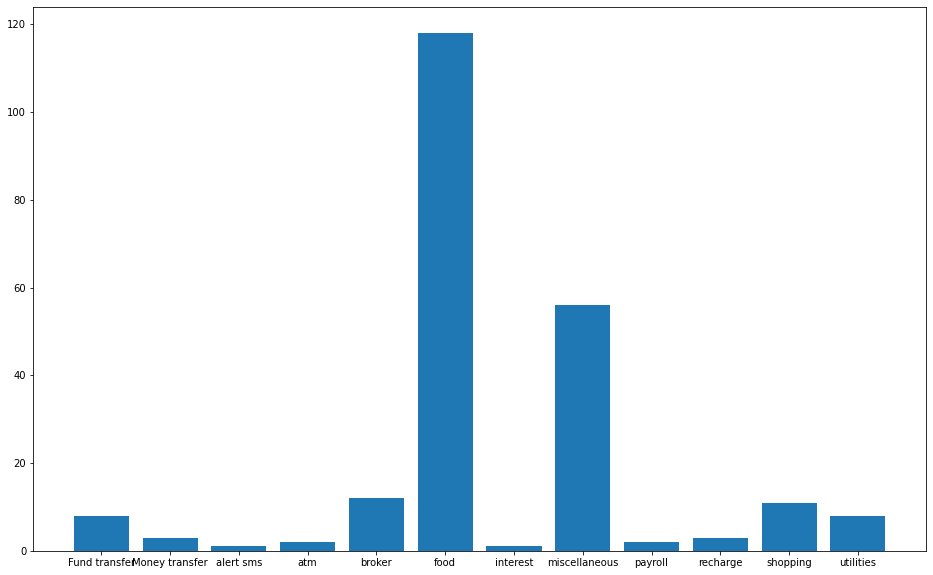

In [348]:
analyse(df)

In [349]:
# seeing the "type" column visualization
def analyzer(df):
    labels = df["Type"].unique()
    counts = df.groupby("Type").size()

    plt.figure(figsize=(16, 10))
    plt.bar(counts.index, counts)
    plt.show()

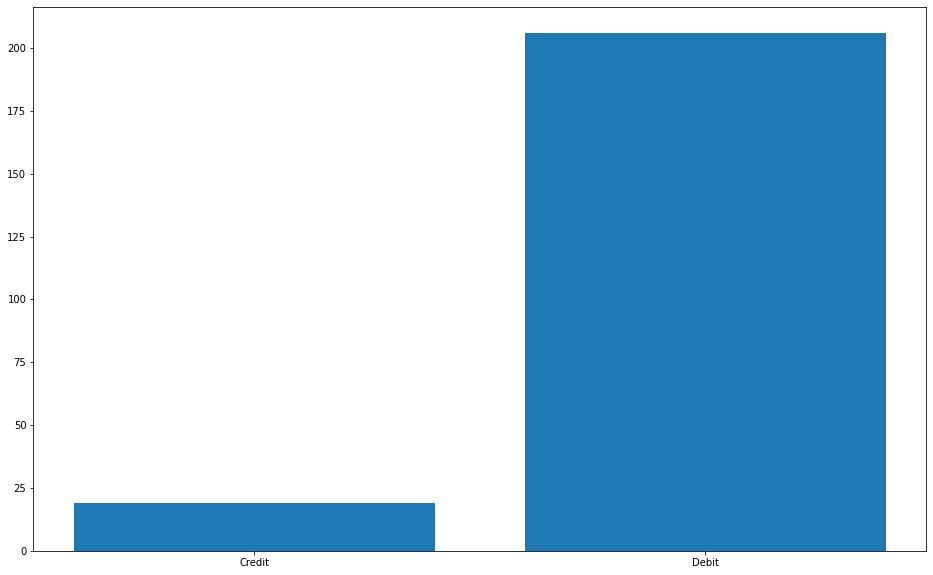

In [350]:
analyzer(df)

In [351]:
# converting the label to numerical category using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
le.classes_

array(['Fund transfer', 'Money transfer', 'alert sms', 'atm', 'broker',
       'food', 'interest', 'miscellaneous', 'payroll', 'recharge',
       'shopping', 'utilities'], dtype=object)

In [352]:
df.columns

Index(['Date', 'Narration', 'Value Date', 'Debit', 'Credit', 'Label', 'Type'], dtype='object')

In [353]:
# we extract data from Narration. so i am going to drop that feature. 
# And also dropping the date features.
df.drop(['Date', 'Narration', 'Value Date'], axis=1, inplace=True)

In [354]:
z = {'Debit' : 0, 'Credit' : 1}
df['Type'] = df['Type'].map(z)
df.head()

,Debit,Credit,Label,Type
0,1.00,0.0,7,0
1,17816.00,0.0,0,0
2,24999.00,0.0,7,0
3,111.18,0.0,5,0
4,40.00,0.0,11,0


In [355]:
x=df.drop(['Type'], axis = 1)
y=df['Type']
x.shape, y.shape

((225, 3), (225,))

## TRAIN - TEST SPLIT

In [356]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

## MODEL BUILDING  USING XGBOOST

In [359]:
import xgboost
clf = xgboost.XGBClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [360]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00         5

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[40  0]
 [ 0  5]]
accuracy is 1.0


Conclusion : My model gives me 100% accuracy with no type 1 error and type 2 error (no false positives and false negatives).